In [1]:
from Func_Col import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [2]:
def frac(x,pos):
    num = int(x*15)
    return fr"$\frac{{{num}}}{{15}}$" if num > 0 else "0"

In [3]:
val = []
for n in np.linspace(0, 1/3 , 1000):
    val.append(realign_log(rhob(n,generate_bell_states())))

In [4]:
e = [0,0,1]
momentum1 = [2,np.sqrt(3),0,0]
momentum2 = [2,-np.sqrt(3),0,0]

In [5]:
xi05 = 0.5
xi08 = 0.8
xi1 = 1

val_05 = realign_val_12_21(e,xi05,momentum1,momentum2)
val_08 = realign_val_12_21(e,xi08,momentum1,momentum2)
val_1 = realign_val_12_21(e,xi1,momentum1,momentum2)

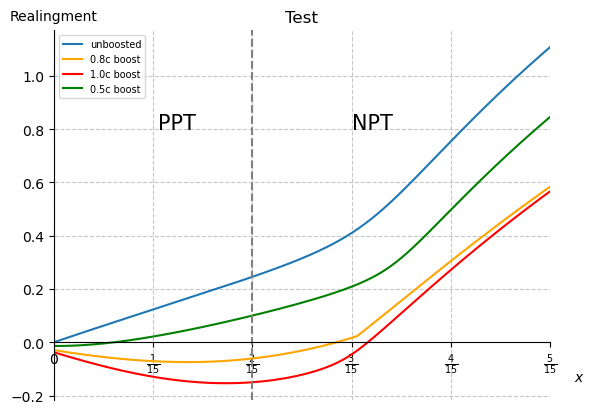

In [6]:
fig, ax = plt.subplots()
#ax.xlim(0,1/3)
#ax.ylim(-0.2)
ax.plot(np.linspace(0,1/3,1000), val, label = "unboosted")
ax.plot(np.linspace(0,1/3,1000), val_08, color = "orange", label="0.8c boost")
ax.plot(np.linspace(0,1/3,1000), val_1, color = "red",label="1.0c boost")
ax.plot(np.linspace(0,1/3,1000), val_05, color = "green",label="0.5c boost")
ax.axvline(2/15, linestyle = "--", color = "grey")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=7)
ax.spines["bottom"].set_position(("data",0))
ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
ax.set(title = "Test",
       xlabel=r"$x$")
ax.set_ylabel("Realingment",rotation = 0)
ax.xaxis.set_label_coords(1.06,0.08)
ax.yaxis.set_label_coords(0,1.02)
ax.text(0.07,0.8,"PPT",fontsize = 15)
ax.text(0.2,0.8,"NPT",fontsize = 15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(1/15))
ax.xaxis.set_major_formatter(FuncFormatter(frac))

In [7]:
momhilbert1 = np.array([1,0])
momhilbert2 = np.array([0,1])

theta = 7*np.pi/5

valt_05 = realign_val_theta2(e,xi05,momentum1,momentum2,theta)
valt_08 = realign_val_theta2(e,xi08,momentum1,momentum2,theta)
valt_1 = realign_val_theta2(e,xi1,momentum1,momentum2,theta)

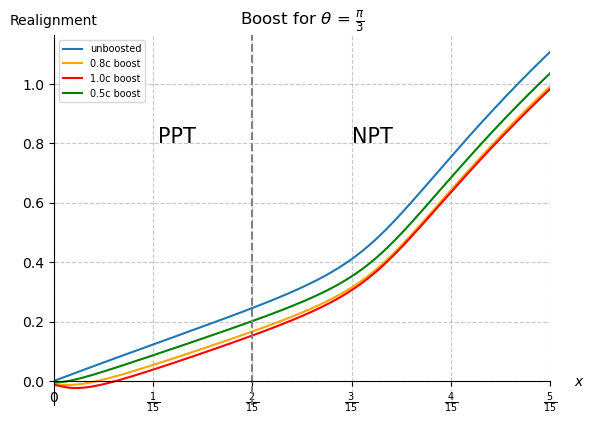

In [8]:
fig, ax = plt.subplots()
#ax.xlim(0,1/3)
#ax.ylim(-0.2)
ax.plot(np.linspace(0,1/3,1000), val, label = "unboosted")
ax.plot(np.linspace(0,1/3,1000), valt_08, color = "orange", label="0.8c boost")
ax.plot(np.linspace(0,1/3,1000), valt_1, color = "red",label="1.0c boost")
ax.plot(np.linspace(0,1/3,1000), valt_05, color = "green",label="0.5c boost")
ax.axvline(2/15, linestyle = "--", color = "grey")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=7)
ax.spines["bottom"].set_position(("data",0))
ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
ax.set(title = fr"Boost for $\theta$ = $\frac{{\pi}}{{3}}$",
       xlabel=r"$x$")
ax.set_ylabel("Realignment",rotation = 0)
ax.xaxis.set_label_coords(1.06,0.08)
ax.yaxis.set_label_coords(0,1.02)
ax.text(0.07,0.8,"PPT",fontsize = 15)
ax.text(0.2,0.8,"NPT",fontsize = 15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(1/15))
ax.xaxis.set_major_formatter(FuncFormatter(frac))

In [9]:
theta = np.pi/4
out = np.array([np.cos(theta),np.sin(theta)])

outer = np.outer(out,out)

for i in range(np.shape(outer)[0]):
    for j in range(np.shape(outer)[1]):
        if outer[i][j] < 1e-10:
            outer[i][j] = 0

outer

array([[0.5, 0.5],
       [0.5, 0.5]])

In [10]:
momhilbert1 = np.array([1,0])
momhilbert2 = np.array([0,1])
mom_theta(theta,momhilbert1,momhilbert2)

array([[0. , 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 0. ],
       [0. , 0.5, 0.5, 0. ],
       [0. , 0. , 0. , 0. ]])

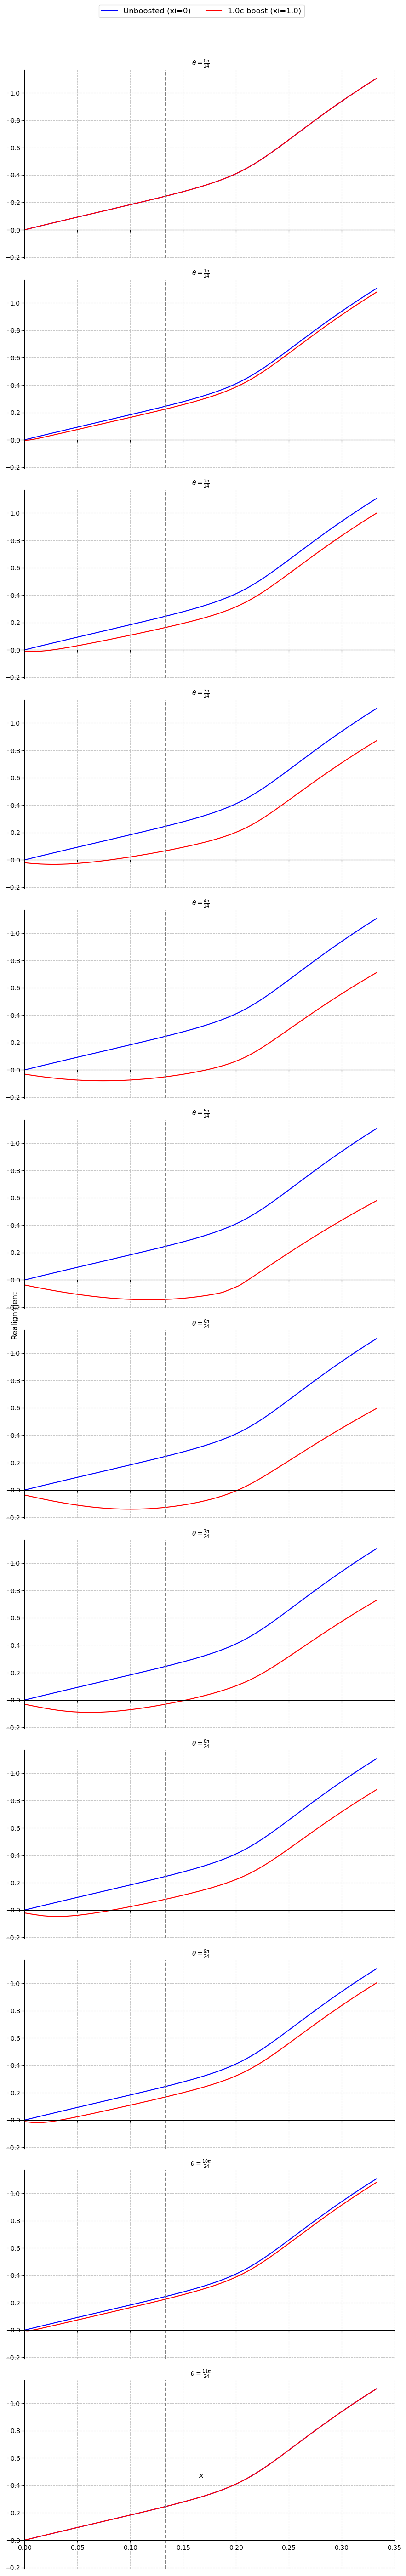

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Function to format axis ticks as fractions
def frac(x, pos):
    """Format axis ticks as fractions."""
    n, d = (2 * x).as_integer_ratio()  # Convert to fraction
    if d == 1:
        return f"${n}$"
    else:
        return f"${n}/{d}$"

# Energy and momentum example values
e = [0, 0, 1]  # Energy
momentum1 = np.array([2, np.sqrt(3), 0,0])  # Example momentum1
momentum2 = np.array([2, -np.sqrt(3), 0,0])  # Example momentum2
xi_values = [0.5, 0.8, 1.0]  # xi values

# Generate 10 values for theta
theta_values = np.linspace(0, np.pi/2, 12)

# Create subplots: 2 rows, 5 columns
fig, axes = plt.subplots(12, 1, figsize=(9, 55), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop over theta values and subplots
for i, theta in enumerate(theta_values):
    ax = axes[i]

    # Compute values for this theta and xi by calling the realign_val_theta2 function
    #valt_05= realign_val_theta2(e, xi_values[0], momentum1, momentum2, theta)
    #valt_08= realign_val_theta2(e, xi_values[1], momentum1, momentum2, theta)
    valt_1 = realign_val_theta2(e, xi_values[2], momentum1, momentum2, theta)
        
        # Plot the results for the various boosts
    ax.plot(np.linspace(0, 1/3, 1000), val, label=f"Unboosted (xi=0)", color="blue")
    #ax.plot(np.linspace(0, 1/3, 1000), valt_05, label=f"0.5c boost (xi={xi_values[0]})", color="green")
    #ax.plot(np.linspace(0, 1/3, 1000), valt_08, label=f"0.8c boost (xi={xi_values[1]})", color="orange")
    ax.plot(np.linspace(0, 1/3, 1000), valt_1, label=f"1.0c boost (xi={xi_values[2]})", color="red")
    
    # Set title for this subplot
    ax.set_title(fr"$\theta = \frac{{{i}\pi}}{{24}}$", fontsize=10)

    # Customize the plot
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    ax.axvline(2/15, linestyle = "--", color = "grey")
    ax.spines["left"].set_position(("data",0))
    ax.spines["bottom"].set_position(("data",0))
    
# Add a single legend and labels for the figure
handles, labels = axes[11].get_legend_handles_labels()
#
fig.legend(handles, labels, loc="upper center", fontsize=12, ncol=4, bbox_to_anchor=(0.5, 1.02))

fig.text(0.5, 0.04, r"$x$", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Realignment", va="center", rotation="vertical", fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
